In [1]:
import joblib
import pandas as pd
import lightgbm as lgb

model = joblib.load("model2.pkl")

In [2]:
data = pd.read_parquet("data/dataset.parquet")
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
# Convert the data into LightGBM's format
train_dataset = lgb.Dataset(train_data.drop('utility', axis=1), label=train_data['utility'])
test_dataset = lgb.Dataset(test_data.drop('utility', axis=1), label=test_data['utility'])

In [3]:
data.head()

,roll,x,y,light_turn,utility,light_score,dark_score,light_left,dark_left,game0,...,game10,game11,game12,game13,game14,game15,game16,game17,game18,game19
0,2,2,4,False,2.586376,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
1,2,2,3,False,0.982283,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
2,3,2,4,False,3.878781,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2,3,False,4.249838,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2,4,False,5.577292,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
predictions = model.predict(test_data.drop('utility', axis=1))
pred_test = pd.DataFrame({"pred": predictions, "test": test_data['utility']})
pred_test["diff"] = (pred_test["pred"] - pred_test["test"]).abs()

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
print(pred_test)

              pred       test      diff
22        0.461313   0.453029  0.008284
28        0.955695   0.958174  0.002479
30       10.465389  10.467832  0.002443
40        4.145841   4.296094  0.150253
41        2.597297   2.755321  0.158024
43       -0.655641  -0.669505  0.013863
58        3.219474   3.202563  0.016911
59       -0.343104  -0.332214  0.010890
62        1.501914   1.456368  0.045547
72        2.861796   3.095263  0.233466
76        0.489591   0.496078  0.006487
78        0.199179   0.013919  0.185261
80        8.095659   8.138896  0.043237
84       -7.554361  -7.586917  0.032556
90        3.760334   3.604860  0.155474
91       -1.891268  -1.806895  0.084373
93       -1.234339  -1.103836  0.130503
107       2.340124   2.470298  0.130174
115       2.584676   2.620811  0.036136
117       2.506413   2.663089  0.156676
120       1.483568   1.593824  0.110256
127      -5.775427  -6.054802  0.279375
134      -3.165868  -3.437130  0.271262
139       4.165990   4.306091  0.140101


array([[<AxesSubplot: title={'center': 'pred'}>,
        <AxesSubplot: title={'center': 'test'}>],
       [<AxesSubplot: title={'center': 'diff'}>, <AxesSubplot: >]],
      dtype=object)

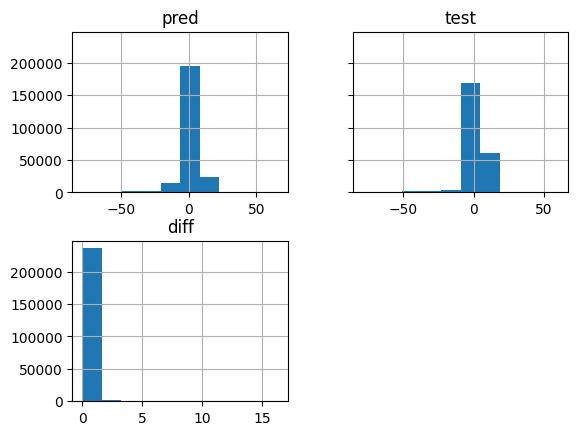

In [6]:
pred_test.hist(sharey=True)

In [11]:
test_data_c = test_data.copy()
test_data_c["pred"] = predictions
test_data_c["diff"] = (test_data_c["pred"] - test_data_c["utility"]).abs()
test_data_c.sort_values("diff", ascending=False)

,roll,x,y,light_turn,utility,light_score,dark_score,light_left,dark_left,game0,...,game12,game13,game14,game15,game16,game17,game18,game19,pred,diff
214855,3,1,0,True,-9.728928,3,6,0,0,0,...,0,0,0,-1,0,-1,1,0,-26.041483,1.631255e+01
529383,2,1,5,False,-34.800340,6,3,0,0,0,...,1,1,0,-1,0,0,0,0,-20.981138,1.381920e+01
1144026,4,2,0,False,8.789917,6,2,0,0,0,...,0,1,0,0,0,0,-1,1,-4.444281,1.323420e+01
650404,3,0,4,True,-35.927757,3,6,1,0,0,...,-1,-1,0,0,0,0,1,0,-23.937309,1.199045e+01
1085688,2,0,7,True,-6.336349,5,3,0,1,0,...,0,1,0,1,0,-1,-1,0,4.497221,1.083357e+01
605643,2,1,5,False,12.000573,5,5,0,0,0,...,0,1,0,0,0,-1,-1,0,1.234759,1.076581e+01
230709,2,0,3,True,-34.168983,3,6,0,0,-1,...,0,1,-1,0,0,0,0,0,-23.599813,1.056917e+01
31701,3,1,6,False,-15.751965,6,2,0,0,0,...,1,0,0,1,0,0,-1,0,-5.291898,1.046007e+01
363324,1,0,7,True,1.727245,2,6,0,0,0,...,0,1,0,0,0,-1,-1,0,-8.610560,1.033781e+01
31702,4,1,4,False,-32.504723,6,2,0,0,0,...,1,0,0,1,0,0,-1,0,-22.241976,1.026275e+01
